In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

In [2]:
# Load the raw data
covid_df = pd.read_csv("Rsources/Raw Data/covid.csv")

# Data Exploration in the Raw Data

In [3]:
covid_df.shape

(566602, 23)

In [4]:
covid_df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [5]:
covid_df.head(15)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,4/5/20,2/5/20,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,6/4/20,1/4/20,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10/4/20,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,16-04-2020,16-04-2020,29-04-2020,2,1,47,97,...,2,2,2,2,2,2,2,99,1,1
6,1.75E+56,2,2,22-04-2020,13-04-2020,9999-99-99,2,2,63,97,...,2,1,2,2,2,2,2,99,1,2
7,0ce1f5,1,1,21-05-2020,18-05-2020,9999-99-99,97,2,56,2,...,2,1,2,2,2,1,1,1,1,97
8,12b57a,1,1,22-04-2020,18-04-2020,9999-99-99,97,2,41,2,...,2,2,2,2,2,2,2,99,1,97
9,006b91,1,2,23-04-2020,18-04-2020,9999-99-99,1,1,39,2,...,2,2,2,2,1,2,2,99,1,2


In [6]:
# Check if there are null values in any column
covid_df.isnull().sum()

id                     0
sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

In [7]:
# Check for datatypes for the data columns
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [8]:
# Count how many female patients are pregnant. To check the general numbers

fem_preg = covid_df.loc[(covid_df.sex == 1) & (covid_df.pregnancy == 1)]
print(len(fem_preg))

4063


In [9]:
# How many Covid positive patients were tobacco users

patient_tobacco = covid_df.loc[(covid_df.covid_res == 2) & (covid_df.tobacco == 1)]
print(len(patient_tobacco))

25846


# Finding value counts of categorical variables

In [10]:
# Create a subset of categorical variables only to check if the variables are good enough for the model
subset = covid_df.drop(columns= ['date_died', 'entry_date', 'date_symptoms', 'id', 'age'])

In [11]:
# Check data types and counts of categorical variables. They need to be integers
for col in subset.columns:
    print(subset[col].value_counts())

2    287112
1    279490
Name: sex, dtype: int64
1    444689
2    121913
Name: patient_type, dtype: int64
97    444689
2     111824
1       9965
99       124
Name: intubed, dtype: int64
2     478416
1      88175
99        11
Name: pneumonia, dtype: int64
97    287112
2     273840
1       4063
98      1587
Name: pregnancy, dtype: int64
2     493790
1      70831
98      1981
Name: diabetes, dtype: int64
2     555723
1       9130
98      1749
Name: copd, dtype: int64
2     546824
1      18026
98      1752
Name: asthma, dtype: int64
2     555644
1       8978
98      1980
Name: inmsupr, dtype: int64
2     472270
1      92508
98      1824
Name: hypertension, dtype: int64
2     546920
1      17084
98      2598
Name: other_disease, dtype: int64
2     552005
1      12775
98      1822
Name: cardiovascular, dtype: int64
2     472549
1      92272
98      1781
Name: obesity, dtype: int64
2     553560
1      11250
98      1792
Name: renal_chronic, dtype: int64
2     516678
1      48017
98      1907
N

In [12]:
# Removing rows that have covid_res= 3 meaning 'pending' as these records have no significance for the model
index_names = covid_df[ covid_df['covid_res'] == 3 ].index
covid_df.drop(index_names, inplace = True)

In [13]:
# Checking value_counts of covid results column (1 - covid positive patients, 2 - covid negative patients)
covid_df['covid_res'].value_counts()

2    279035
1    220657
Name: covid_res, dtype: int64

In [14]:
# Change date_died column to categorical data "9999-99-99" to 0 (patient survived) and row with date to 1 (patient died)
covid_df.loc[covid_df.date_died == "9999-99-99", "date_died"] = 0

In [15]:
covid_df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,4/5/20,2/5/20,0,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,0,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,6/4/20,1/4/20,0,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10/4/20,0,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [17]:
covid_df.loc[covid_df.date_died != 0, "date_died"] = 1

In [18]:
covid_df.head(10)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,4/5/20,2/5/20,0,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,0,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,6/4/20,1/4/20,0,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10/4/20,0,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,1,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,16-04-2020,16-04-2020,1,2,1,47,97,...,2,2,2,2,2,2,2,99,1,1
6,1.75E+56,2,2,22-04-2020,13-04-2020,0,2,2,63,97,...,2,1,2,2,2,2,2,99,1,2
7,0ce1f5,1,1,21-05-2020,18-05-2020,0,97,2,56,2,...,2,1,2,2,2,1,1,1,1,97
8,12b57a,1,1,22-04-2020,18-04-2020,0,97,2,41,2,...,2,2,2,2,2,2,2,99,1,97
9,006b91,1,2,23-04-2020,18-04-2020,0,1,1,39,2,...,2,2,2,2,1,2,2,99,1,2


In [19]:
# Check counts of patients who survived vs. died
covid_df['date_died'].value_counts()

0    465571
1     34121
Name: date_died, dtype: int64

In [20]:
# Make sure that this column is an integer
covid_df["date_died"] = covid_df["date_died"].astype("int64")

# Visualization for additional data exploration

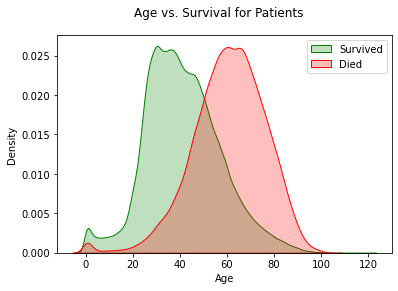

In [21]:
# Plotting Age vs Survival rate of Patients Admitted to the hospital
fig, ax = plt.subplots()

sns.kdeplot(covid_df[covid_df["date_died"]==0]["age"], shade=True, color="green", label="Survived", ax=ax)
sns.kdeplot(covid_df[covid_df["date_died"]==1]["age"], shade=True, color="red", label="Died", ax=ax)

ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Density")

fig.suptitle("Age vs. Survival for Patients");
plt.savefig('output.png', dpi=300, bbox_inches='tight')

### The above graph showing distribution of survived vs. Died looks similar for different age groups and hence cannot be considered a factor for Covid deaths. So this column can be dropped

[Text(0, 0, 'positive'), Text(1, 0, 'not positive')]

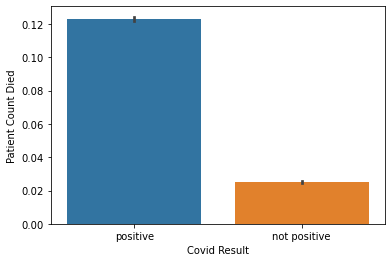

In [22]:
# Plotting Patient Count Died versus Covid Result. Indicates a strong correlation between positive covid result and death
ax = sns.barplot(x="covid_res", y="date_died", data=covid_df)
ax.set_xlabel("Covid Result")
ax.set_ylabel("Patient Count Died")
ax.set_xticklabels(["positive", "not positive"])

In [23]:
# Filter data only for patients that died
filter_df_death = covid_df[covid_df['date_died'] == 1] 
filter_df_death

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
4,0d01b5,1,2,13-04-2020,13-04-2020,1,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,16-04-2020,16-04-2020,1,2,1,47,97,...,2,2,2,2,2,2,2,99,1,1
24,008b81,1,1,15-05-2020,6/5/20,1,97,2,61,2,...,2,1,2,2,2,2,2,1,1,97
36,17394f,2,2,27-04-2020,27-04-2020,1,2,1,77,97,...,2,1,2,2,2,2,2,99,1,2
41,006ddc,1,2,26-04-2020,23-04-2020,1,2,1,53,2,...,2,2,2,2,1,2,2,99,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499540,16d102,2,2,17-06-2020,17-06-2020,1,2,1,73,97,...,2,2,2,1,2,1,1,99,2,2
499574,105f35,2,2,28-03-2020,27-03-2020,1,2,1,55,97,...,1,2,1,2,2,2,1,99,2,2
499582,02e521,2,2,29-04-2020,27-04-2020,1,2,1,37,97,...,2,1,2,2,2,2,2,2,2,2
499606,16ca9a,2,2,31-03-2020,30-03-2020,1,2,1,84,97,...,2,2,1,1,2,1,2,99,2,2


[Text(0, 0, 'positive'), Text(1, 0, 'not positive')]

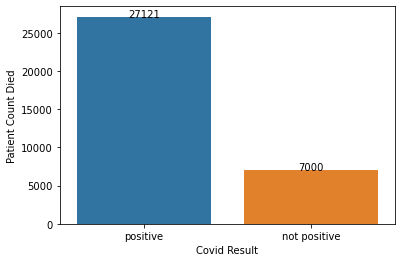

In [24]:
# Plotting Patient Count Died versus Covid Result to see actual count of patients died based on covid result. 
groupedvalues = filter_df_death.groupby('covid_res').sum().reset_index()
groupedvalues.head()

gx =sns.barplot(x='covid_res',y='date_died',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    gx.text(row.name,row.date_died, round(row.date_died,2), color='black', ha="center")
    
gx.set_xlabel("Covid Result")
gx.set_ylabel("Patient Count Died")
gx.set_xticklabels(["positive", "not positive"])

[Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'NA')]

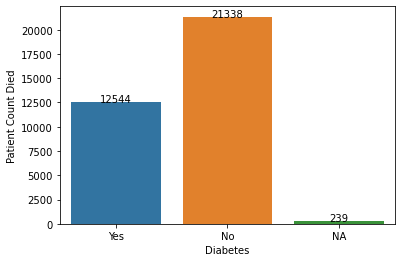

In [25]:
# Plotting Patient Count Died for patients having diabetes  
groupedvalues = filter_df_death.groupby('diabetes').sum().reset_index()
groupedvalues.head()

gxd =sns.barplot(x='diabetes',y='date_died',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    gxd.text(row.name,row.date_died, round(row.date_died,2), color='black', ha="center")
    
gxd.set_xlabel("Diabetes")
gxd.set_ylabel("Patient Count Died")
gxd.set_xticklabels(["Yes", "No", "NA"])

[Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'NA')]

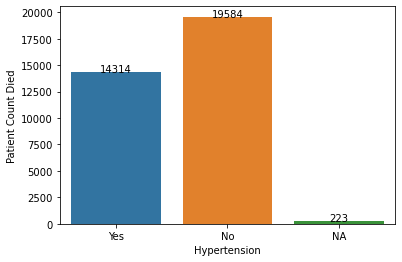

In [26]:
# Plotting Patient Count Died based for patients having hypertension 
groupedvalues = filter_df_death.groupby('hypertension').sum().reset_index()
groupedvalues.head()

gxd =sns.barplot(x='hypertension',y='date_died',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    gxd.text(row.name,row.date_died, round(row.date_died,2), color='black', ha="center")
    
gxd.set_xlabel("Hypertension")
gxd.set_ylabel("Patient Count Died")
gxd.set_xticklabels(["Yes", "No", "NA"])

[Text(0, 0, 'Yes'),
 Text(1, 0, 'No'),
 Text(2, 0, 'NA'),
 Text(3, 0, 'Not Provided')]

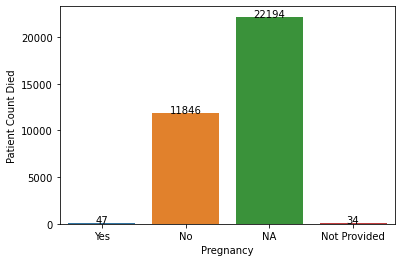

In [27]:
# Plotting Patient Count Died for pregnant patients
groupedvalues = filter_df_death.groupby('pregnancy').sum().reset_index()
groupedvalues.head()

gxd =sns.barplot(x='pregnancy',y='date_died',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    gxd.text(row.name,row.date_died, round(row.date_died,2), color='black', ha="center")
    
gxd.set_xlabel("Pregnancy")
gxd.set_ylabel("Patient Count Died")
gxd.set_xticklabels(["Yes", "No", "NA", "Not Provided"])

[Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'Not Provided')]

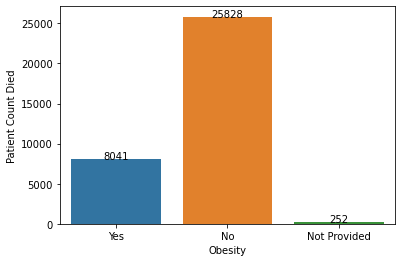

In [28]:
# Plotting Patient Count Died based on obesity 
groupedvalues = filter_df_death.groupby('obesity').sum().reset_index()
groupedvalues.head()

gxd =sns.barplot(x='obesity',y='date_died',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    gxd.text(row.name,row.date_died, round(row.date_died,2), color='black', ha="center")
    
gxd.set_xlabel("Obesity")
gxd.set_ylabel("Patient Count Died")
gxd.set_xticklabels(["Yes", "No", "Not Provided"])

Text(0, 0.5, 'Patient Count Died')

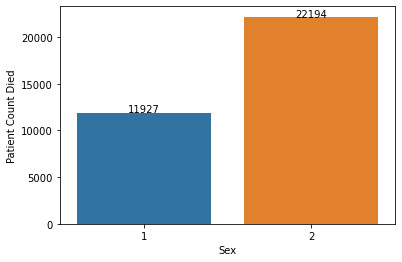

In [29]:
# Plotting Patient Count Died based on sex 
groupedvalues = filter_df_death.groupby('sex').sum().reset_index()
groupedvalues.head()

gxd =sns.barplot(x='sex',y='date_died',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    gxd.text(row.name,row.date_died, round(row.date_died,2), color='black', ha="center")
    
gxd.set_xlabel("Sex")
gxd.set_ylabel("Patient Count Died")

In [30]:
# Create new dataframe with only pre-existing conditions for patients who died
pre_existing_df_died = filter_df_death.drop(columns= ['sex', 'icu', 'covid_res', 'contact_other_covid', 'intubed', 'patient_type'])
pre_existing_df_died = pre_existing_df_died[pre_existing_df_died['date_died'] == 1] 
pre_existing_df_died = pre_existing_df_died.drop(columns= ['id','entry_date','date_symptoms','date_died','age'])
pre_existing_df_died

,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco
4,2,2,1,2,2,2,1,2,1,2,2,2
5,1,97,1,2,2,2,2,2,2,2,2,2
24,2,2,2,2,2,2,1,2,2,2,2,2
36,1,97,2,2,2,2,1,2,2,2,2,2
41,1,2,1,2,2,2,2,2,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
499540,1,97,2,2,2,2,2,2,1,2,1,1
499574,1,97,1,2,2,1,2,1,2,2,2,1
499582,1,97,2,2,2,2,1,2,2,2,2,2
499606,1,97,2,2,2,2,2,1,1,2,1,2


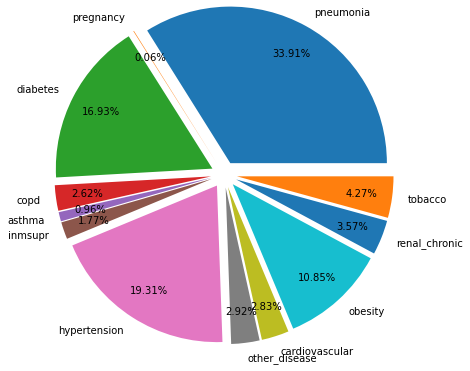

In [31]:
# Plotting precentage of pre-exsiting conditions in the dataset where patient actually died -- Anshu
pre_existing_count_died = []
pre_existing_labels_died = []
for col in pre_existing_df_died.columns:
    pre_existing_count_died.append(len(pre_existing_df_died[pre_existing_df_died[col] == 1].index))
    pre_existing_labels_died.append(col)
fig, ax = plt.subplots(figsize=(3, 3))
ax.pie(pre_existing_count_died, labels=pre_existing_labels_died, autopct='%.2f%%', 
        pctdistance = 0.8,
        explode=[0.2]*12, 
        radius = 2.4)
#ax.set_title('Pre-existing Conditions')
plt.show()

[Text(0, 0, 'positive'), Text(1, 0, 'not positive')]

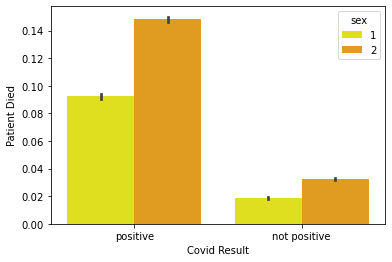

In [32]:
# Plotting Male/Female Patient Count Died vs Covid Result"
ax = sns.barplot(x="covid_res", y="date_died", hue="sex", palette={1:"yellow", 2:"orange"}, data=covid_df)
ax.set_xlabel("Covid Result")
ax.set_ylabel("Patient Died")
ax.set_xticklabels(["positive", "not positive"])

In [33]:
# Create new dataframe with only pre-existing conditions
pre_existing_df = subset.drop(columns= ['sex', 'icu', 'covid_res', 'contact_other_covid', 'intubed', 'patient_type'])
pre_existing_df

,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco
0,2,97,2,2,2,2,2,2,2,2,2,2
1,2,97,2,2,2,2,2,2,2,2,2,2
2,2,2,2,2,2,2,2,2,2,1,2,2
3,1,97,2,2,2,2,2,2,2,2,2,2
4,2,2,1,2,2,2,1,2,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
566597,2,97,1,2,2,2,2,2,2,2,2,2
566598,2,2,2,2,2,2,2,2,2,2,2,2
566599,1,2,2,2,2,2,2,2,2,1,2,2
566600,1,2,2,2,2,2,2,2,2,2,2,2


In [34]:
# len(df[df.sex == 1].index)
pre_existing_count = []
pre_existing_labels = []
for col in pre_existing_df.columns:
    pre_existing_count.append(len(pre_existing_df[pre_existing_df[col] == 1].index))
    pre_existing_labels.append(col)

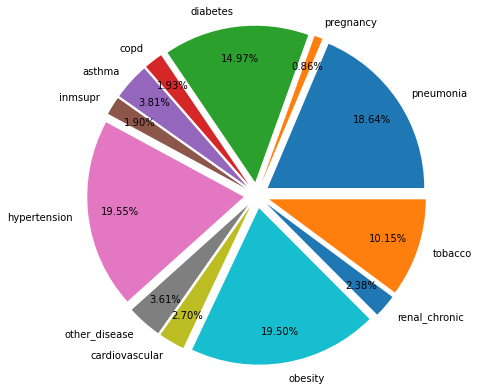

In [35]:
# Plotting precentage of pre-exsiting conditions in the dataset
fig, ax = plt.subplots(figsize=(3, 3))
ax.pie(pre_existing_count, labels=pre_existing_labels, autopct='%.2f%%', 
        pctdistance = 0.8,
        explode=[0.2]*12, 
        radius = 2.4)
#ax.set_title('Pre-existing Conditions')
plt.show()